# [L&S 88]  Open Science -- Project 1, part 2
---

### Instructor: Josh Quan & Eric Van Dusen

The key takeaway of this notebook is that the outcome of your notebook depends on the decision points that you take as you build your model. Picking different variables, keeping or removing outliers, aggregating one way versus another, are all examples of such important decisions. On this notebook, you will first observe how the different elements that we picked to build our sample model contributed to our final solution. After you review the model that we have pre-made for you, it would be your turn to build your own path!

**Topics Covered:**
* Building a model - where EDA matters
* Building your own path - how distinct decision points affect the final outcome

**Table of Contents:**

[Data](#section1)<br>

[Sample Model](#section2) <br>
1. [General](#section3)<br>

2. [Decision Point 1](#section4) <br>

3. [Decision Point 2](#section5) <br>

4. [Decision Point 3](#section6) <br>

5. [Decision Point 4](#section7) <br>

6. [Decision Point 5](#section8) <br>


[ Deciding your own adventure!](#section9) <br>
1. [Decision Point 1](#section10) <br>

2. [Decision Point 2](#section11) <br>

3. [Decision Point 3](#section12) <br>

4. [Decision Point 4](#section13) <br>

5. [Decision Point 5](#section14) <br>

6. [Decision Point 6](#section15) <br>

7. [Decision Point 7](#section16) <br>


Please run the cell below before you begin.
#### Dependencies:

In [19]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression

---
## Data<a id='section1'></a>
---

We will be working on the same data set as in the previous notebook. We have included the data dictionary below for your  reference. 

|Variable Name   | Description |
|--------------|------------|
|`player` | player's name |
|`club` | player's soccer club (team) |
|`leagueCountry`| country of player club (England, Germany, France, and Spain) |
|`height` | player height (in cm) |
|`games`| number of games in the player-referee dyad |
|`position` | detailed player position |
|`goals`| goals scored by a player in the player-referee dyad |
|`yellowCards`| number of yellow cards player received from referee |
|`yellowReds`| number of yellow-red cards player received from referee |
|`redCards`| number of red cards player received from referee |
|`rater1`| skin rating of photo by rater 1 (5-point scale ranging from very light skin to very dark skin |
|`rater2`| skin rating of photo by rater 2 (5-point scale ranging from very light skin to very dark skin |
|`meanIAT`|  mean implicit bias score (using the race IAT) for referee country, higher values correspond to faster white good, black bad associations |
|`meanExp`| mean explicit bias score (using a racial thermometer task) for referee country, higher values correspond to greater feelings of warmth toward whites versus blacks |

In [20]:
soccer = Table.read_table('CrowdstormingDataJuly1st.csv')
soccer.show(5)

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044
abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181,79,nan,1,0,1,0,0,1,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165
pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191,87,Center Back,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165
ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172,70,Right Midfielder,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165


---
## Sample Model<a id='section2'></a>
---

On this section, we will explore different decisions points, including data cleaning, transformations, and aggregations. We will use several of the EDA techniques that we learned on the previous part since EDA provides us with a frame for interesting details to focus that otherwise are easy to overlook. For instance, it can help us identify if variables have missing values, if a column had extreme outliers, if two numerical variables are perfectly correlated, etc. These points are important because they can drastically affect the performance of our model. 


### General :<a id='section3'></a>
--- 
Often times, we want to look at the summary statistics of different variables (e.g. min, max, mean, median, etc.) before you start running any models. The goal of this is to get to know your data and to avoid running into issues down the road. We will begin by looking at some summary statistics, then we will create some metrics to see if there is anything useful we can use in our model.

We will begin by selecting only the variables we are interested in using the function select(). Namely, `birthday`,`height`,`weight`,`games`,`victories`,`ties`,`defeats`,`goal`,`yellowCards`,`yellowReds`,`redCards`,`rater1`,`rater2`, `meabIAT`,`meanExp`. 

In [21]:
quantitative=soccer.select("height","weight","games","victories","ties","defeats","goals","yellowCards","yellowReds","redCards","rater1","rater2", "meanIAT","meanExp")
quantitative.show(5)

height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,meanIAT,meanExp
177,72,1,0,0,1,0,0,0,0,0.25,0.5,0.326391,0.396
179,82,1,0,0,1,0,1,0,0,0.75,0.75,0.203375,-0.204082
181,79,1,0,1,0,0,1,0,0,nan,nan,0.369894,0.588297
191,87,1,1,0,0,0,0,0,0,nan,nan,0.369894,0.588297
172,70,1,1,0,0,0,0,0,0,nan,nan,0.369894,0.588297


Now, we will calculate some summary statistics for the whole table. Let's begin by finding the min.

In [22]:
for col_index in range(len(quantitative)):
    print("Min {}: {}".format(quantitative.labels[col_index],min(quantitative.column(col_index))))  

Min height: 161.0
Min weight: 54.0
Min games: 1
Min victories: 0
Min ties: 0
Min defeats: 0
Min goals: 0
Min yellowCards: 0
Min yellowReds: 0
Min redCards: 0
Min rater1: 0.0
Min rater2: 0.0
Min meanIAT: -0.0472542252767709
Min meanExp: -1.375


Now, let's inspect the **max**

In [23]:
for col_index in range(len(quantitative)):
    print("Max {}: {}".format(quantitative.labels[col_index],max(quantitative.column(col_index))))  

Max height: 203.0
Max weight: 100.0
Max games: 47
Max victories: 29
Max ties: 14
Max defeats: 18
Max goals: 23
Max yellowCards: 14
Max yellowReds: 3
Max redCards: 2
Max rater1: 1.0
Max rater2: 1.0
Max meanIAT: 0.573793286802122
Max meanExp: 1.8


Now, we will see the number of **missing values** in each of our columns.

In [24]:
for col_index in range(len(quantitative)):
    print("Number of nan {}: {}".format(quantitative.labels[col_index],sum(np.isnan(quantitative.column(col_index)))))

Number of nan height: 263
Number of nan weight: 2243
Number of nan games: 0
Number of nan victories: 0
Number of nan ties: 0
Number of nan defeats: 0
Number of nan goals: 0
Number of nan yellowCards: 0
Number of nan yellowReds: 0
Number of nan redCards: 0
Number of nan rater1: 21407
Number of nan rater2: 21407
Number of nan meanIAT: 163
Number of nan meanExp: 163


This is an interesting point to consider in the future sections. As you can notice, there are over 20,000 missing data values for certain variables. You should think about what this means for your analysis and if you should include them and how.

Missing data also means that we cannot use traditional functions to calculate the sum, mean, and median. This is because the functions do not know to perform algebraic operations non-existing and non-numerical values, for example:

In [25]:
np.sum(np.array([1,3,4,np.nan]))

nan

Run the two cells below. One uses **np.sum** and the other **np.nansum**. Compare the results.

In [26]:
#np.sum
for col_index in range(len(quantitative)):
    print("Sum with nan {}: {}".format(quantitative.labels[col_index],np.sum(quantitative.column(col_index))))    

Sum with nan height: nan
Sum with nan weight: nan
Sum with nan games: 426572
Sum with nan victories: 186674
Sum with nan ties: 103423
Sum with nan defeats: 136475
Sum with nan goals: 49366
Sum with nan yellowCards: 56274
Sum with nan yellowReds: 1662
Sum with nan redCards: 1834
Sum with nan rater1: nan
Sum with nan rater2: nan
Sum with nan meanIAT: nan
Sum with nan meanExp: nan


In [27]:
#np.nansum
for col_index in range(len(quantitative)):
    print("Sum without nan {}: {}".format(quantitative.labels[col_index],np.nansum(quantitative.column(col_index))))  

Sum without nan height: 26519892.0
Sum without nan weight: 10938539.0
Sum without nan games: 426572
Sum without nan victories: 186674
Sum without nan ties: 103423
Sum without nan defeats: 136475
Sum without nan goals: 49366
Sum without nan yellowCards: 56274
Sum without nan yellowReds: 1662
Sum without nan redCards: 1834
Sum without nan rater1: 32931.75
Sum without nan rater2: 37743.0
Sum without nan meanIAT: 50509.50080909433
Sum without nan meanExp: 65934.70588842861


More interesting than inspecting non-nan sum, is actually looking at overall means. However, like we explained above, you might run into some issues if your data contains missing values. For this we will use **np.nanmean**.

In [28]:
for col_index in range(len(quantitative)):
    print("Mean {}: {}".format(quantitative.labels[col_index],np.nanmean(quantitative.column(col_index))))  

Mean height: 181.93593798236887
Mean weight: 76.07566157805056
Mean games: 2.921165803818446
Mean victories: 1.278343879256033
Mean ties: 0.7082408853096667
Mean defeats: 0.934581039252746
Mean goals: 0.33805845454296435
Mean yellowCards: 0.3853644506532994
Mean yellowReds: 0.011381378913633002
Mean redCards: 0.012559235215164215
Mean rater1: 0.2642552218325964
Mean rater2: 0.3028622784281943
Mean meanIAT: 0.3462756714022852
Mean meanExp: 0.4520255434026573


Lastly, we will repeat procedure as we did above to find the median- that is, ignoring the nan values. We will use the function **np.nanmedian**. 

In [29]:
for col_index in range(len(quantitative)):
    print("Median {}: {}".format(quantitative.labels[col_index],np.nanmedian(quantitative.column(col_index))))  

Median height: 182.0
Median weight: 76.0
Median games: 2.0
Median victories: 1.0
Median ties: 0.0
Median defeats: 1.0
Median goals: 0.0
Median yellowCards: 0.0
Median yellowReds: 0.0
Median redCards: 0.0
Median rater1: 0.25
Median rater2: 0.25
Median meanIAT: 0.336628162642721
Median meanExp: 0.356445562281524


### Decision Point 1 <a id='section4'></a>
---
We suspect that an interesting variable to observe has to do with the skin tones of the player. On our dataset we have two variables that contain that information-namely `rater1` and `rater2`. Since deciding under what catagorie (from very light skin- very dark skin) each player fits according to rating is very subjective depending on the eye of the onbserver, we will look into each of these variables individually and then we will take the average of the two variables and use that as a new metric.

Getting the average of the two rates requires a series of steps. We will: 
1. Create get the average of the two raters and assign it to a new variable called `avg_rate`
2. Add it to the orignal data table: `soccer`
3. Remove from the data table any column that has missing data (nan) for the `avg_rate` column, and assign this clean table to `cleaned_soccer.`

Calculate the mean

In [30]:
avg_rate = (soccer.column('rater1') + soccer.column('rater2'))/2

Add it to the data table

In [39]:
soccer.append_column('avgRate', avg_rate)

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avgRate
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649,0.375
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044,0.75
abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181,79,nan,1,0,1,0,0,1,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan
pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191,87,Center Back,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan
ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172,70,Right Midfielder,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan
aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182,71,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.125
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187,80,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.125
alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180,68,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1,1,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,1
anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193,80,Goalkeeper,1,0,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.25
andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180,70,Right Fullback,1,1,0,0,0,0,0,0,36499.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0


Remove columns.

Hint: We will use the method exclude in the Tables library to "exclude" certain rows form for data. We will first create an array called to_exclude with the index of the rows we want to remove and then we will add feed it to the exclude method.

In [32]:
to_exclude= make_array()
for row_index in range(len(soccer.column("avgRate"))):
    if np.isnan(soccer.column("avgRate").item(row_index)):
        to_exclude= np.append(to_exclude,int(row_index))

In [40]:
cleaned_soccer = soccer.exclude(to_exclude)
cleaned_soccer.show(5)

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avgRate
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649,0.375
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044,0.75
aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182,71,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.125
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187,80,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.125
alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180,68,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1,1,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,1


Now, let's verify that we obtained the desired output. We will  compare the size length of the original data table (soccer) to the new one (cleaned_soccers).

In [41]:
print("Number of nan {}: {}".format(cleaned_soccer.labels[28],sum(np.isnan(cleaned_soccer.column(28)))))
print("")
print("The orginal data table, soccer, has {} rows, while the new one, cleaned_soccer, has {} rows. ".format(len(soccer.column(1)), len(cleaned_soccer.column(1))))

Number of nan avgRate: 0

The orginal data table, soccer, has 146028 rows, while the new one, cleaned_soccer, has 124621 rows. 


Now we want to inspect the number of red, yellow, and yellow-red cards by skin color according to the two raters, and the average rate. To do this, we will

Create subtables using group, sort, and select.
Plot the results of each rater group by the number of red cards awarded to players based on their skin color.

**Rater 1**

In [42]:
#Table
#group 
rater1_cards = cleaned_soccer.group('rater1',np.mean)
#sort
rater1_cards.sort('redCards mean', descending=True)
#select
rater1_cards.select(['rater1','redCards mean', 'yellowCards mean', 'yellowReds mean'])

rater1,redCards mean,yellowCards mean,yellowReds mean
0,0.0113915,0.387652,0.0111906
0.25,0.0136131,0.432575,0.0132012
0.5,0.0129457,0.373502,0.0112443
0.75,0.0136828,0.365961,0.011262
1,0.0150246,0.371552,0.0135468


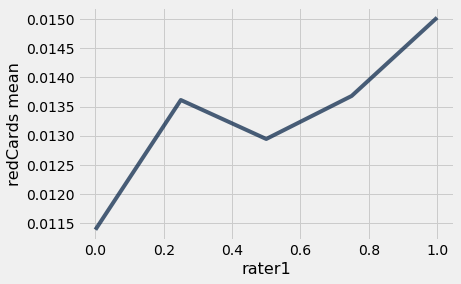

In [43]:
#Plot
rater1_cards.select("redCards mean","rater1").plot("rater1")

**Rater 2**

In [ ]:
#Table
#group 
rater2_cards = cleaned_soccer.group('rater2',np.mean)
#sort
rater2_cards.sort('redCards mean', descending=True)
#select
rater2_cards.select(['rater2','redCards mean', 'yellowCards mean', 'yellowReds mean'])

In [ ]:
#Plot
rater2_cards.select("redCards mean", "rater2").plot("rater2")

**Average Rate**

In [44]:
#table
#group 
avgRate_cards = cleaned_soccer.group('avgRate',np.mean)
#sort
avgRate_cards.sort('redCards mean', descending=True)
#select
avgRate_cards.select(['avgRate','redCards mean', 'yellowCards mean', 'yellowReds mean'])

avgRate,redCards mean,yellowCards mean,yellowReds mean
0,0.0112979,0.386442,0.0112683
0.125,0.0110763,0.38258,0.0109085
0.25,0.01389,0.436275,0.0130851
0.375,0.0147976,0.466215,0.0162239
0.5,0.0139059,0.365335,0.0106797
0.625,0.00620604,0.314439,0.00951593
0.75,0.0141263,0.373217,0.0111598
0.875,0.0144315,0.325942,0.0112636
1,0.0146631,0.375561,0.0136063


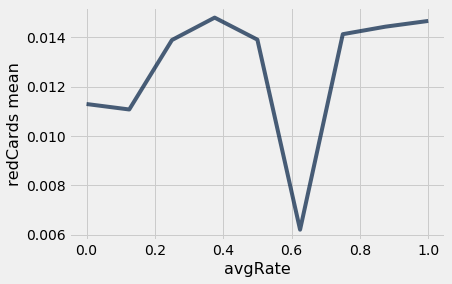

In [45]:
#plot
avgRate_cards.select("redCards mean","avgRate").plot("avgRate")

### Decision Point 2:<a id='section5'></a>
--- 

From the previous notebook, we observed how grouping by position reveals interesting information about what players get a red card. Maybe the number of red cards is depending on the position, and not on the skin tone. Maybe many of the positions that get red carded are played by darker skin players, and that is why this we hypothesize that the skin tone is related to red cards. We will explore these questions further by looking into the position of the players. 


Since our end goal is to create a model with this table, we have to think about what type of data does the model takes. For the most part, the models you have covered in class only take numerical values. You might be wondering, how can we numerically encode categorical data such as position. One option is to use a technique called `one-hot encododing` You can learn more about it here #[one-hot](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) 

Since there does not exist an easy way to do this using the Tables library, we will create it ourselves. It should have: 

1. A new column for each of the positions
2. Each new column should have the same number of rows as the data set, but made up of zeros on every entry except the ones where the value on the position column matches the column name. For example
  
|Postion| Attacking Midfielder| Center Back|
|-------|---------------------|-----------|
| Attacking Midfielder| 1|0|
|Center Back| 0 |1|

In [3]:
# DO NOT WORRY ABOUT THE IMPLEMENTATION BELOW.
# On this cell we have made a new dictionary where the keys are the positions
# and the values are columns made up of the 0's and 1' following the structure above. 

position_label=['Attacking Midfielder','Center Back','Center Forward','Center Midfielder','Defensive Midfielder','Goalkeeper','Left Fullback', 'Left Midfielder', 'Left Winger', 'Right Fullback', 'Right Midfielder', 'Right Winger']
cat_levels = {label:list() for label in position_label}
for entry in cleaned_soccer.column("position"):
    for key, value in cat_levels.items():
        if entry == key:
            cat_levels[entry].append(1)
        else:
            cat_levels[key].append(0)

# Saving the 12 key value pairs on the dictioanry to a list that will serve as the new columns for the data frame
dataSource = []
for key, value in cat_levels.items():
    dataSource.append(key)
    dataSource.append(value)

NameError: name 'cleaned_soccer' is not defined

In [2]:
soccer_one_hot= cleaned_soccer.with_columns(*dataSource).drop("position")

NameError: name 'cleaned_soccer' is not defined

In [1]:
soccer_one_hot.show(5)

NameError: name 'soccer_one_hot' is not defined

### Decision Point 3:<a id='section6'></a>
---
Another feature that might be interesting to observe is the number of cards per game. On the section below we will create two new features **yellowCardsPerGame**  and **redCardsPerGame**, and then add it to our newly created data table **soccer_one_hot**. 


In [ ]:
# Yellow Cards
soccer_one_hot=soccer_one_hot.with_columns("yellowCardsPerGame",soccer_one_hot.column('yellowCards') / soccer_one_hot.column('games'))

In [ ]:
# Red Cards
soccer_one_hot=soccer_one_hot.with_column("redCardsPerGame",soccer_one_hot.column('redCards') / soccer_one_hot.column('games'))

In [ ]:
soccer_one_hot.show(3)

### Decision Point 4:<a id='section7'></a>
---
From the 3 rows above we can notice something interesting in the total number of cards per game that might reveal insights about which players get carded how often and which type of card. On the cells below, we will group by the player to get the average number of red and yellow cards that players get per game.

In [ ]:
soccer_one_hot.num_rows

In [37]:
grouped_players= soccer_one_hot.group('player',np.mean)
grouped_players.show(3)

NameError: name 'soccer_one_hot' is not defined

There are some interesting observations that come from grouping this way. This first is that, there are some players that play on multiple positions, and the second is that there are is definitely some players that get carded more often than others.

### Decision Point 5:<a id='section8'></a>

There are different types of models that we can use to test whether some players receive a card more often than others. On this section, we will build a basic linear regression model using the data table we created above to predict the average number of yellow cards a given player receives.

Let's look at the table again.

In [4]:
grouped_players.show(3)

NameError: name 'grouped_players' is not defined

We will predict the number of yellow cards per game from the mean IAT score. To do this, we will begin by selecting these two columns and producing a scatter plot. 

In [36]:
grouped_players.select("meanIAT mean", 'yellowCardsPerGame mean').scatter("meanIAT mean")


NameError: name 'grouped_players' is not defined

Notice that overplotting makes it difficult to interpret the plot. But, let's look at the correlation between the two variables. 

In order to do that, we must convert our values to standard units. We will use the function defined below-called standard_units to do this.

In [ ]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.nanmean(any_numbers))/np.nanstd(any_numbers) 

Now we will apply this function to average yellow card per game, and to the meanExp and assign them to new variables. 

In [ ]:
meanExp_standard = standard_units(grouped_players.column("meanIAT mean"))
yellow_standard = standard_units(grouped_players.column('yellowCards mean'))

Now, we will create a new data table containing

1. the standardized variables found above
    * meanExp_standard
    * yellow_standard
2. the original values
   * meanIAT mean
    * yellowCardsPerGame mean
3. player

In [ ]:
yellow_std =  Table().with_columns(["meanIAT mean",grouped_players.column("meanIAT mean"),
                                    'yellowCardsPerGame mean',grouped_players.column('yellowCardsPerGame mean'),
                                    'meanIAT mean_standard',meanExp_standard,
                                    'yellow_standard',  yellow_standard,
                                    "player", grouped_players.column("player")])
yellow_std.show(3)

Now let's plot the standardized values we just found above.

In [ ]:
yellow_std.select('meanIAT mean_standard', 'yellow_standard').scatter('meanIAT mean_standard')

We can see that the points look about the same as they did before, but now the diagram is drawn on the same scale, making it easier to identify linear relations. 

Using standard units also let's compute the correlation coefficient, *r*. The following is drawn from the [Data 8 Textbook section 15.1](https://www.inferentialthinking.com/chapters/15/1/Correlation.html)

**The Formula for $r$**:

**$r$ is the average of the products of the two variables when both variables are measured in standard units.**

Let's define a function ``correlation`` that takes a table and the labels of two columns in the table. The function returns $r$, the mean of the products of those column values in standard units.

In [ ]:
def correlation(t, x, y):
    """
    t: Data table 
    x: column label for x coordinate
    y: column label for y coordinate 
    """
    return np.nanmean(standard_units(t.column(x))*standard_units(t.column(y)))

Now, let's find the correlation for `meanIAT mean_standard` and `yellow_standard`.

In [ ]:
correlation(yellow_std, 'meanIAT mean_standard','yellow_standard')

We can see that there is a very small positive correlation between meanIAT and the number of yellow cards. "The correlation coefficient measures the strength of the linear relationship between two variables. Graphically, it measures how clustered the scatter diagram is around a straight line." [source](https://www.inferentialthinking.com/chapters/15/1/Correlation)

Now we can use this information to create a simple model. As a reminder, our basic model has the form of 

**estimated value = slope $*$ feature column $+$ y-intercept**
 
To compute this, we need to introduce two new functions. Namely, we need a function to compute the ``slope`` and the ``y-intercept``(Make sure to click on the link above if you want to learn why we are using these functions).



In [ ]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.nanstd(t.column(label_y))/np.nanstd(t.column(label_x))

In [ ]:
def intercept(t, label_x, label_y):
    return np.nanmean(t.column(label_y)) - slope(t, label_x, label_y)*np.nanmean(t.column(label_x))

Now, will use them to build our model.

Calculate
1. Correlation
2. Slope
3. Y-Intercept

In [35]:
yellow_std_r = correlation(yellow_std, "meanIAT mean_standard", 'yellow_standard')
yellow_std_slope = slope(yellow_std, 'meanIAT mean_standard', 'yellow_standard')
yellow_std_intercept = intercept(yellow_std, 'meanIAT mean_standard', 'yellow_standard')

NameError: name 'correlation' is not defined

Create the regression function using the values found above and assign its calculated values to a new column called `Regression_Prediction`.

In [34]:
yellow_std = yellow_std.with_column(
    'Regression_Prediction', yellow_std_slope*yellow_std.column('meanIAT mean_standard') + yellow_std_intercept
)
yellow_std.show(5)

NameError: name 'yellow_std' is not defined

Now, plot you original data and the regression prediction line.  

In [16]:
yellow_std.select("meanIAT mean_standard", "yellow_standard", "Regression_Prediction").scatter("meanIAT mean_standard")
                   

NameError: name 'yellow_std' is not defined

All done! In here we constructed a very basic linear regression model using only one feature/column to predict the average number of yellow cards given per game.

Now it is your turn to create your own model using metrics and features of your choice. As you might have noticed there are some outcomes from the decision points that we did not include in our analysis, for instance, the player's position. This will require a multi-linear regression since now we have a feature for each position. When you build your models, you will sometimes find this to be the case, and you will need to change your model and its components along the way.

---
## Deciding your own adventure! <a id='section9'></a>
---

On this section of the notebook, you will also have to face the difficult decision that data scientists face when they build their models. Decisions such as:
* picking a dataset
* picking certain variables while discarding others
* creating new metrics
* handling outliers 
* choosing one model over another 
will have an incredible impact over the final results. 

For each of the following make sure to 
1. Choose one of the options provided 
2. Support your decision by including visualizations 
3. Provide a short explanation to why you think that variable or metric matters for determining if certain players get penalized more than others

Note: At the end of this exercise your final outcome should be different(for the most part) to that of your peers.  

You can look at the EDA notebook you completed last week to get inspired! 

For this exercise make sure to use the table: **cleaned_soccer**

### Decision Point 1:<a id='section10'></a>

#### a) Select estimation (variable): Predict on yellow cards
#### b) Select estimation (variable): Predict on red cards

*On our model we chose `yellow cards`*

In [ ]:
q1_choice= r"  "

In [ ]:
# YOUR CODE HERE

In [ ]:
q1_response=r"  "

### Decision Point 2:<a id='section11'></a>


#### a) Select estimation (metric): yellow/red cards (per game)
#### b) Select estimation (metric):  yellow/red cards (total)
#### c) Select estimation (variable): yellow/red cards (percent of total)
*On our model we chose `yellow cards per game`*

In [ ]:
q2_choice= r"  "

In [ ]:
# YOUR CODE HERE

In [23]:
q2_response=r"  "

### Decision Point 3:<a id='section12'></a>

#### a) Select estimation (metric) : Mean of yellow/red cards
#### b) Select estimation (metric): Count/sum of yellow/red cards
#### c) Select estimation (metric): Median of yellow/red cards

*On our model we chose `yellow cards per game mean`*

In [24]:
q3_choice= r"  "

In [25]:
# YOUR CODE HERE

In [26]:
q3_response=r"  "

### Decision Point 4:<a id='section13'></a>

#### a)  Select predictor (feature): avg goals/game
#### b)  Select predictor (feature): average winning/losing rate

*On our model we chose `meanIAT mean`*

In [27]:
q4_choice= r"  "

In [28]:
# YOUR CODE HERE

In [29]:
q4_response=r"  "

### Decision Point 5:<a id='section14'></a>

#### a)  Select predictor (feature): BMI
#### b)  Select predictor (feature)  average winning/losing rate

In [30]:
q5_choice= r"  "

In [31]:
# YOUR CODE HERE

In [32]:
q5_response=r"  "

### Decision Point 6:<a id='section15'></a>


#### a)  Select predictor (feature): weight 
#### b)  Select predictor (feature): age

In [33]:
q6_choice= r"  "

In [34]:
# YOUR CODE HERE

In [35]:
q6_response=r"  "

### Decision Point 7:<a id='section16'></a>

#### a)  Select model: Simple linear regression (using one feature from the ones you created above)

*On our model we chose `meanIAT mean`*

In [36]:
q7_choice= r"  "

In [37]:
# YOUR CODE HERE

In [38]:
q7_response=r"  "

---
Notebook developed by: Keilyn Yuzuki, Lisa Zhou, Karla Palos

Data Science Modules: https://data.berkeley.edu/education/modules